In [2]:
import numpy as np
from hipposlam.utils import read_pickle
from hipposlam.sequences import Sequences
from hipposlam.comput_utils import circular_gau_filter, divide_ignore, midedges, Arena
import pandas as pd
import matplotlib.pyplot as plt
from os.path import join
import os
import matplotlib as mpl
from matplotlib import cm
from tqdm import tqdm
from scipy.ndimage import gaussian_filter
from scipy.special import factorial
# Paths and data===============
debug_plot_tag = True
project_tag = 'Avoidance'
data_dir = join('data', project_tag)
plot_dir = join('plots', project_tag, 'BayesianDecoding')
os.makedirs(plot_dir, exist_ok=True)
trajdata = read_pickle(join(data_dir, 'traj.pickle'))
metadata = read_pickle(join(data_dir, 'meta.pickle'))
metadata['seqR'] = 5 # For now. Remove this line next time after seqR is stored in the metadata
metadata['seqL'] = 10 # For now. Remove this line next time after seqL is stored in the metadata
seqR = metadata['seqR']
seqL = metadata['seqL']
fkey2id_dict = metadata['stored_f']
id2fkey_dict = {val:key for key, val in fkey2id_dict.items()}
f_pos = metadata['fpos']
trajdf = pd.DataFrame(trajdata)
trajdf['X_Nrow'] = trajdf['X'].apply(lambda x : x.shape[0])
trajdf['a'] = trajdf['rota'] * trajdf['rotz']

In [9]:
class MatrixJ:

    def __init__(self, N, K, F):
        self.mat = np.zeros((N, K, F))


    def expand_F(self, num:int):
        mat_to_append = np.zeros((self.mat[0], self.mat[1], num))
        self.mat = np.append(self.mat, mat_to_append, axis=2)

    def expand_N(self, num:int):
        mat_to_append = np.zeros((num, self.mat[1], self.mat[2]))
        self.mat = np.append(self.mat, mat_to_append, axis=0)

    def increment(self, X, target_n:int):

        assert (X.shape[0] == self.mat.shape[2])  # same F
        assert (X.shape[1] == self.mat.shape[1])  # same K
        self.mat[target_n, :, :] = self.mat[target_n, :, :] + X.T

    def normalize(self):
        N, K, F = self.mat.shape
        assert N > 0
        assert F > 0
        area = np.sum(np.sum(self.mat ** 2, axis=1), axis=1)
        self.mat = self.mat / area



In [12]:
foo1 = np.random.randint(0, 10, (4, 3, 2))
foo2 = np.random.randint(0, 10, (4, 3, 2))


np.append(foo1, foo2, axis=2).shape

(4, 3, 4)

In [ ]:



class HippoLearner:
    def __init__(self, R, L):
        self.K = R + L - 1  # Number of columns of J

        self.current_F = 0
        self.previous_F = 0  # Number of feature nodes when the learning started
        self.N = 0  # Number of state nodes
        self.J = MatrixJ(self.N, self.K, self.current_F)  # MatrixJ mapping J.reshape(N, -1) @ X.flatten() = State vector
        self.learn_mode = False
        self.NL = L  #  Number of learning steps.
        self.learn_l = 0  # the l-th learning step

    def step(self, X):
        """

        Parameters
        ----------
        X : ndarray
            2-d array with shape (F, K). F = Number of feature nodes. K = R + L - 1.

        Returns
        -------

        """
        newF = X.shape[0]

        if newF > self.current_F:
            self.learn_mode = True

            # Extend self.J.mat to the shape of X
            dF = newF - self.J.mat.shape[2]
            self.J.expand_F(dF)

            # Create a new state node
            self.J.expand_N(1)
            self.N += 1

        if self.learn_mode:

            self.J.increment()





        pass








C:\Users\Hoi\AppData\Local\Temp\ipykernel_10308\3989564073.py:5: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.imshow(X)


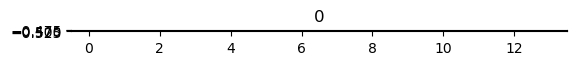

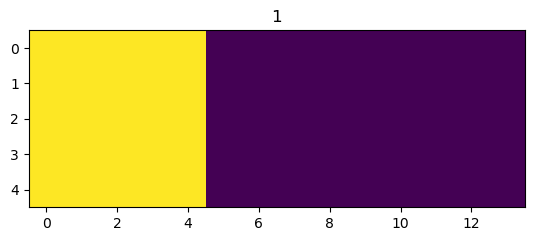

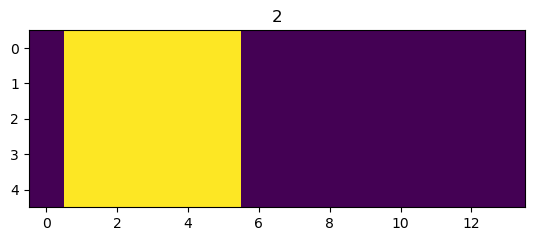

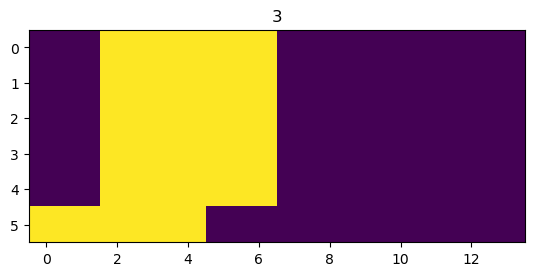

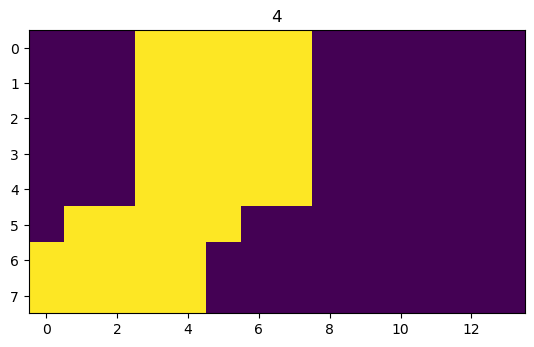

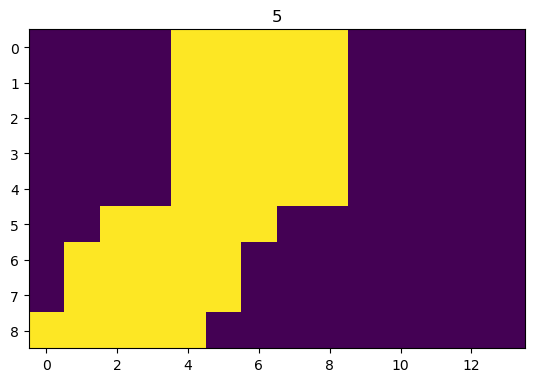

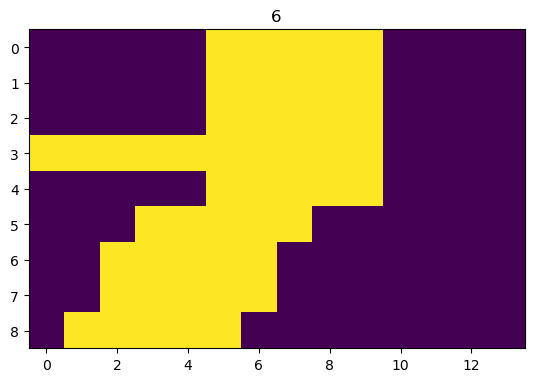

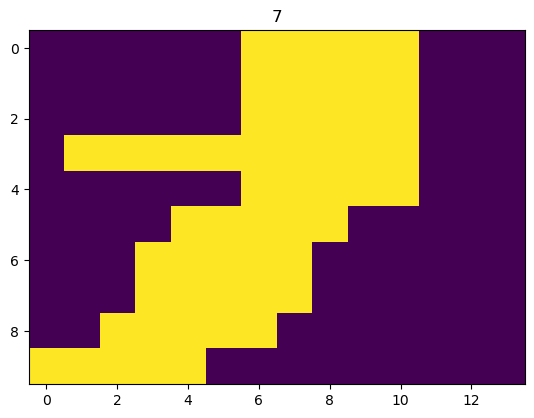

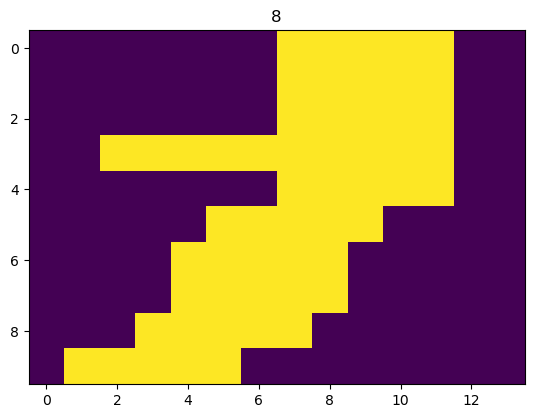

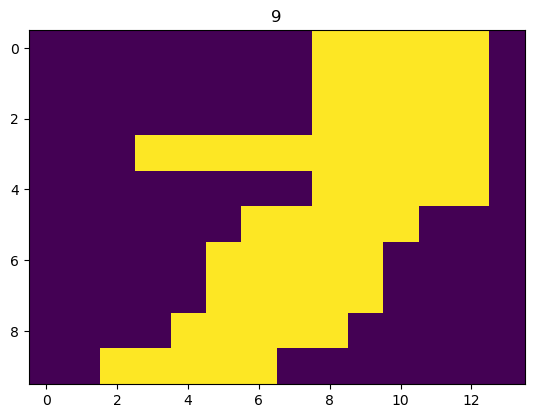

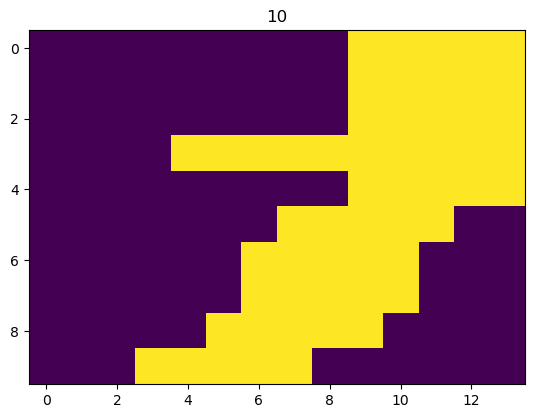

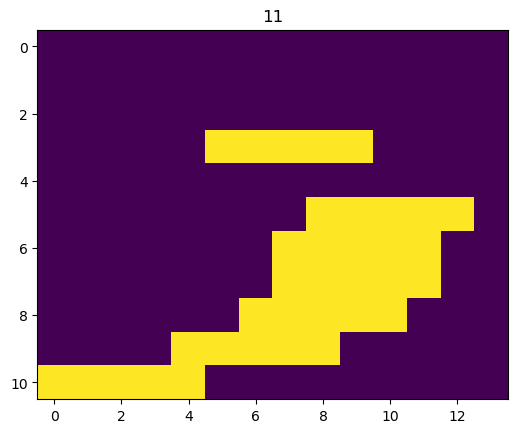

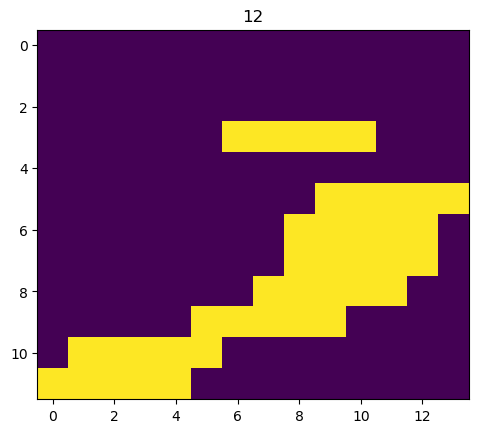

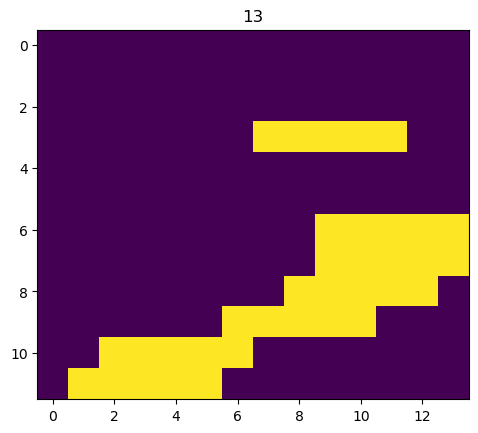

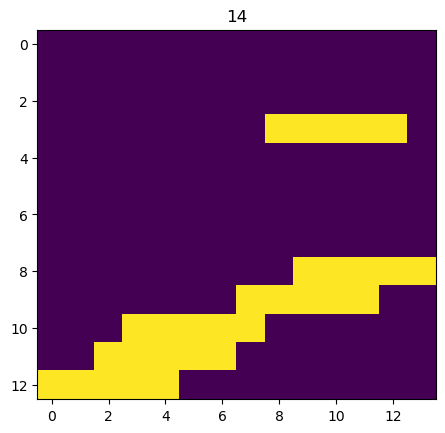

In [8]:
for i in range(15):
    X = trajdf['X'][i]

    fig, ax = plt.subplots()
    ax.imshow(X)
    ax.set_title(i)

